In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pyfolio as pf

C:\Users\A715-72G\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [3]:
'''
let's get ETF data
SPY = S&P 500 ETF
QQQ = Nasdaq ETF
GLD = SPDR Gold ETF
IEF = 7-10y bond ETF 
TMF = 20+ y bond 3x ETF
'''
data = yf.download(tickers = "SPY QQQ GLD IEF TMF", period='10y')

[*********************100%***********************]  5 of 5 completed


In [4]:
df = data.Close.fillna(method='ffill')

In [5]:
spy = df.SPY.copy()

In [8]:
spy_ret = spy.pct_change().iloc[1:]

In [9]:
spy_ret.head()

Date
2011-10-18    0.019546
2011-10-19   -0.011829
2011-10-20    0.004376
2011-10-21    0.018987
2011-10-24    0.012261
Name: SPY, dtype: float64

In [10]:
spy_ret.tail(5)

Date
2021-10-08   -0.001824
2021-10-11   -0.007240
2021-10-12   -0.002462
2021-10-13    0.003598
2021-10-14    0.016821
Name: SPY, dtype: float64

In [12]:
pf.create_returns_tear_sheet(spy_ret, live_start_date='2018-12-31')

TypeError: Invalid comparison between dtype=datetime64[ns] and Timestamp

In [13]:
print(spy_ret.index.tzinfo)

None


In [14]:
spy_ret.tz_localize('UTC')

Date
2011-10-18 00:00:00+00:00    0.019546
2011-10-19 00:00:00+00:00   -0.011829
2011-10-20 00:00:00+00:00    0.004376
2011-10-21 00:00:00+00:00    0.018987
2011-10-24 00:00:00+00:00    0.012261
                               ...   
2021-10-08 00:00:00+00:00   -0.001824
2021-10-11 00:00:00+00:00   -0.007240
2021-10-12 00:00:00+00:00   -0.002462
2021-10-13 00:00:00+00:00    0.003598
2021-10-14 00:00:00+00:00    0.016821
Name: SPY, Length: 2515, dtype: float64

In [16]:
spy_ret.index = pd.to_datetime(spy_ret.index).tz_localize('UTC')

In [17]:
spy_ret.index

DatetimeIndex(['2011-10-18 00:00:00+00:00', '2011-10-19 00:00:00+00:00',
               '2011-10-20 00:00:00+00:00', '2011-10-21 00:00:00+00:00',
               '2011-10-24 00:00:00+00:00', '2011-10-25 00:00:00+00:00',
               '2011-10-26 00:00:00+00:00', '2011-10-27 00:00:00+00:00',
               '2011-10-28 00:00:00+00:00', '2011-10-31 00:00:00+00:00',
               ...
               '2021-10-01 00:00:00+00:00', '2021-10-04 00:00:00+00:00',
               '2021-10-05 00:00:00+00:00', '2021-10-06 00:00:00+00:00',
               '2021-10-07 00:00:00+00:00', '2021-10-08 00:00:00+00:00',
               '2021-10-11 00:00:00+00:00', '2021-10-12 00:00:00+00:00',
               '2021-10-13 00:00:00+00:00', '2021-10-14 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=2515, freq=None)

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,34.10,2020-02-19,2020-03-23,2020-08-18,130
1,20.18,2018-09-20,2018-12-24,2019-04-29,158
2,14.35,2015-05-21,2016-02-11,2016-07-12,299
3,10.16,2018-01-26,2018-04-02,2018-08-24,151
4,9.80,2020-09-02,2020-09-23,2020-11-13,53


C:\Users\A715-72G\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


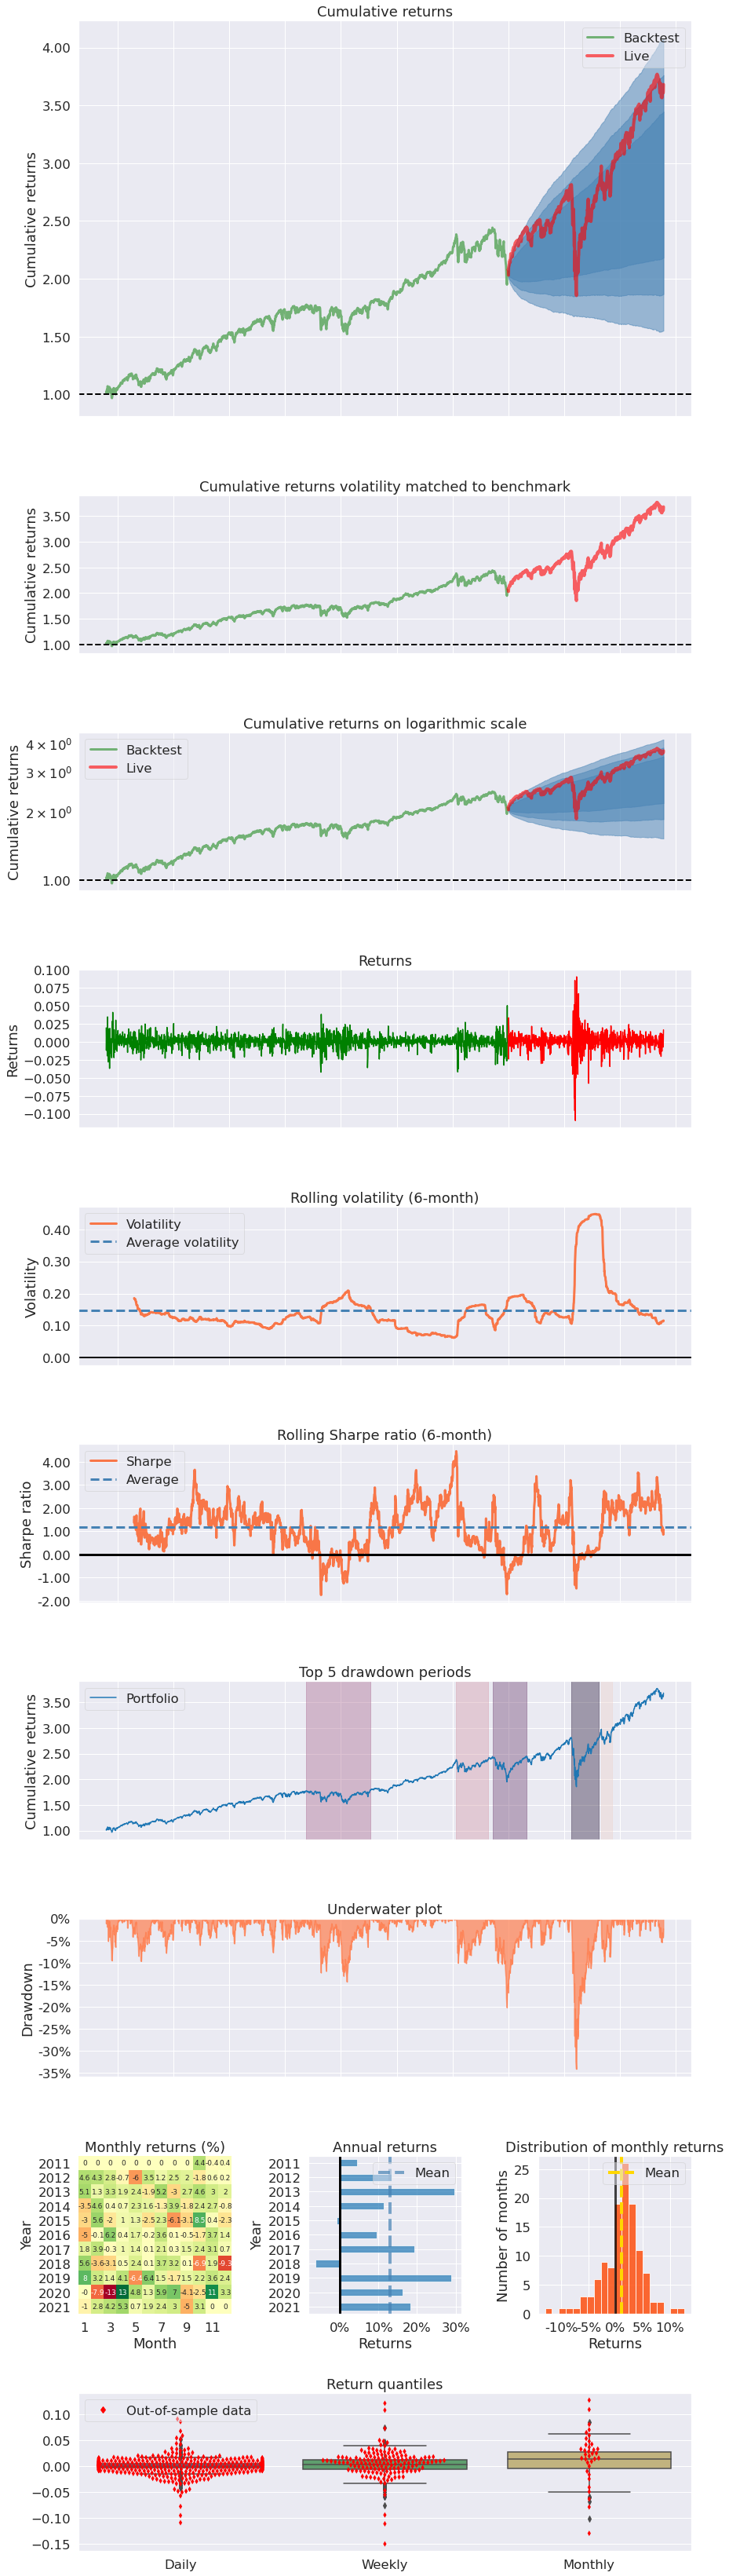

In [18]:
pf.create_returns_tear_sheet(spy_ret, live_start_date='2018-12-31')

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,34.10,2020-02-19,2020-03-23,2020-08-18,130
1,20.18,2018-09-20,2018-12-24,2019-04-29,158
2,14.35,2015-05-21,2016-02-11,2016-07-12,299
3,10.16,2018-01-26,2018-04-02,2018-08-24,151
4,9.80,2020-09-02,2020-09-23,2020-11-13,53


C:\Users\A715-72G\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\A715-72G\anaconda3\lib\site-packages\pandas\core\indexes\base.py:5277: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  start_slice, end_slice = self.slice_locs(start, end, step=step, kind=kind)


Stress Events,mean,min,max
EZB IR Event,-0.03%,-1.06%,1.52%
Apr14,0.04%,-2.10%,1.08%
Oct14,0.11%,-1.98%,1.98%
Fall2015,-0.26%,-4.21%,3.84%
Recovery,0.06%,-3.69%,4.11%
New Normal,0.06%,-10.94%,9.06%


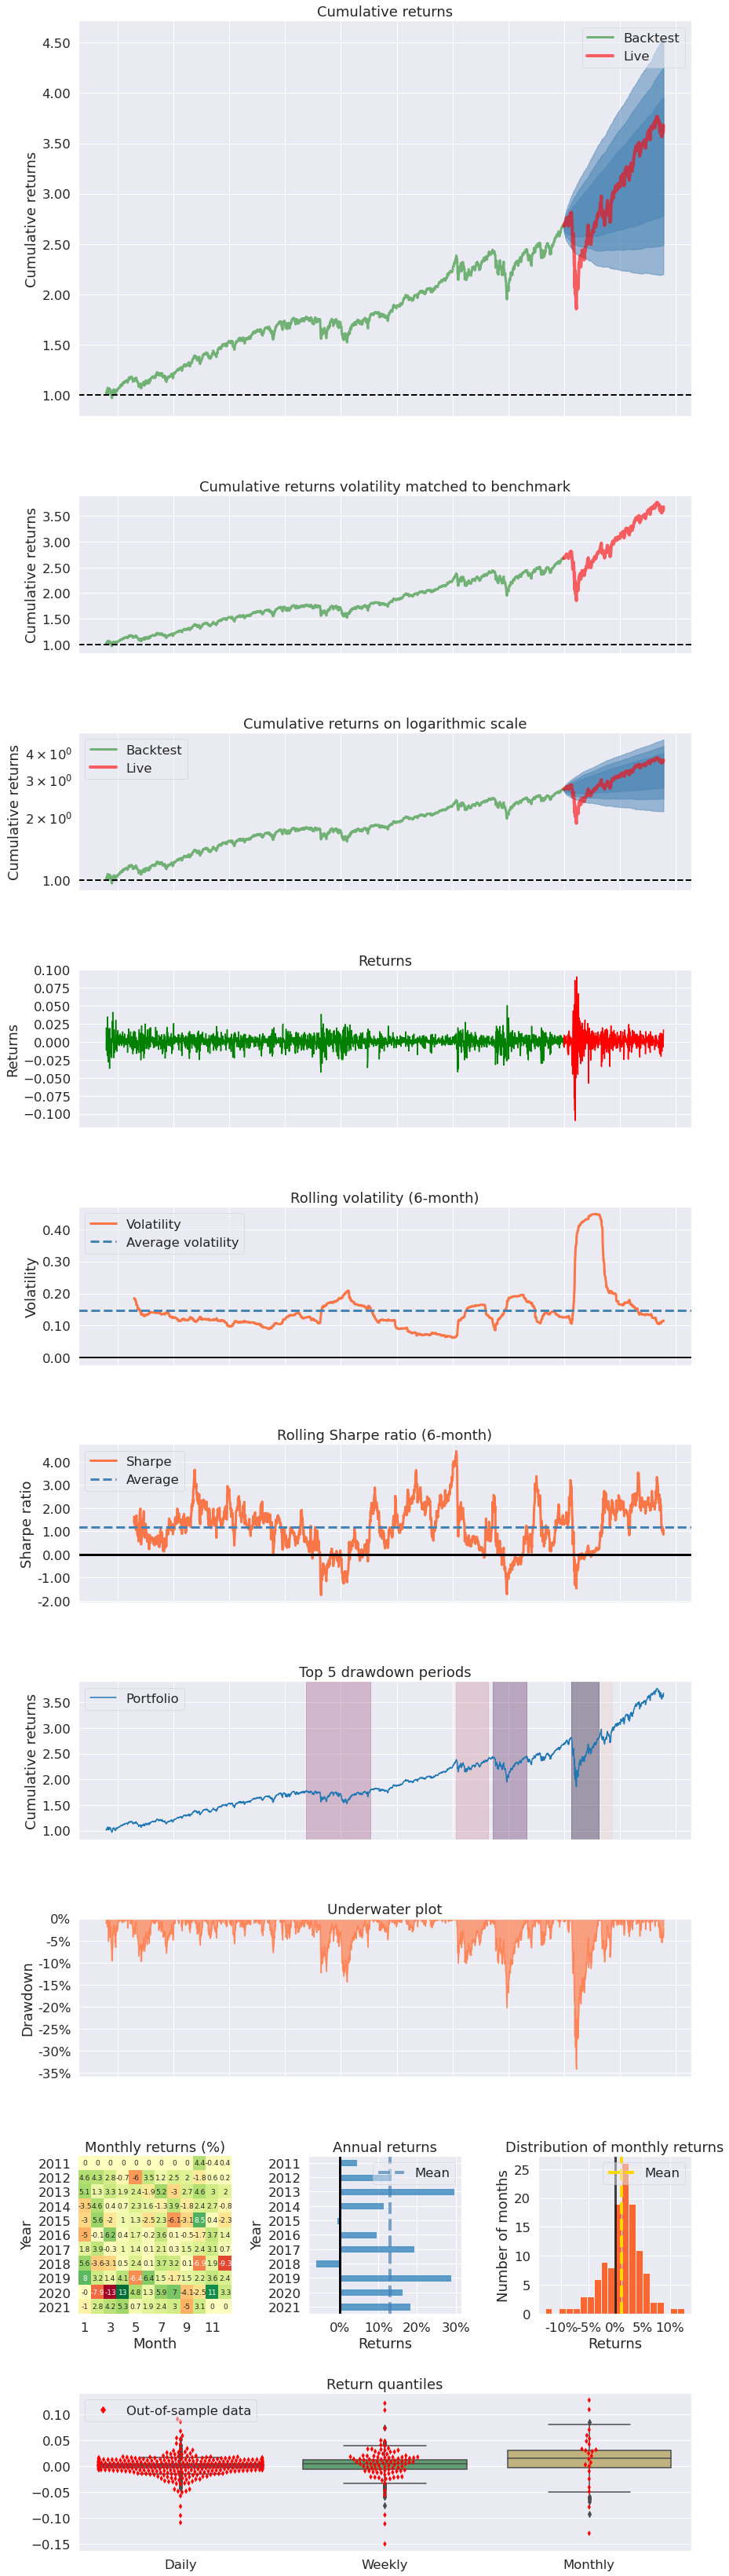

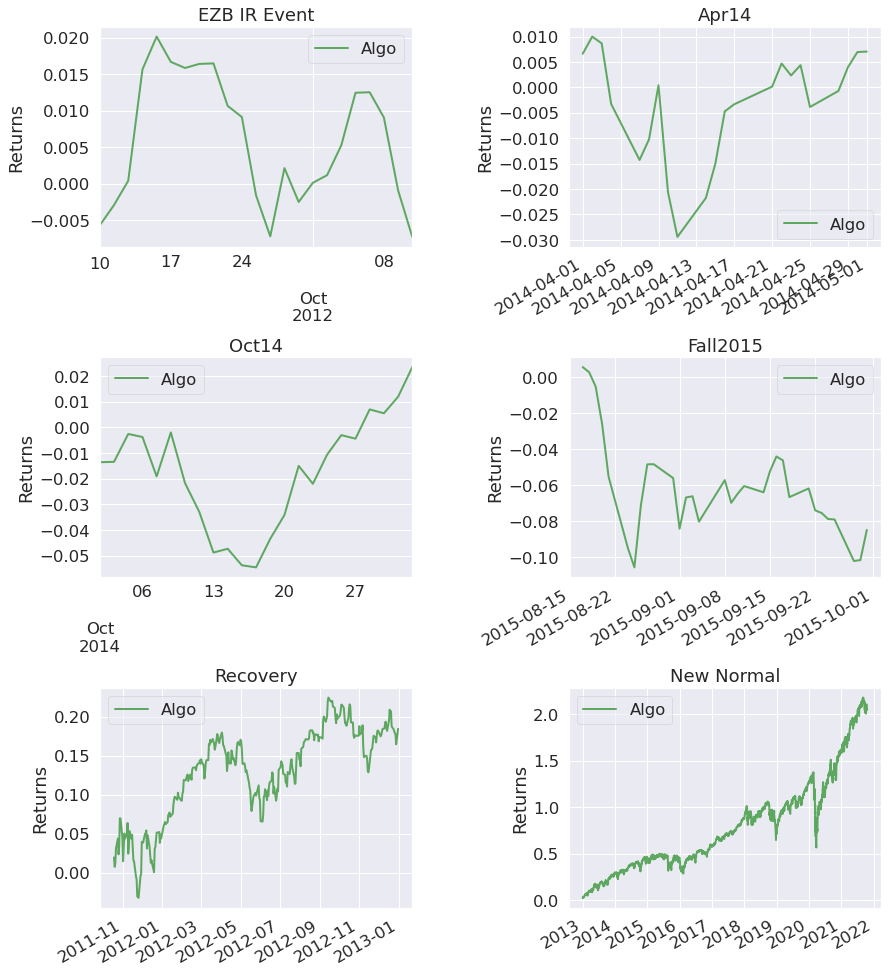

In [19]:
pf.create_full_tear_sheet(spy_ret, live_start_date='2019-12-31')

### Data structures used by pyfolio

In [21]:
port =df.loc[:, ['QQQ', 'SPY']].copy()

In [22]:
port_ret = port.pct_change()

In [23]:
initial_amount = 100000
# assume no fees

In [24]:
port_ret

,QQQ,SPY
Date,,
2011-10-17,NaN,NaN
2011-10-18,0.012395,0.019546
2011-10-19,-0.019314,-0.011829
2011-10-20,-0.004923,0.004376
2011-10-21,0.012546,0.018987
...,...,...
2021-10-08,-0.004987,-0.001824
2021-10-11,-0.007670,-0.007240
2021-10-12,-0.003488,-0.002462


In [25]:
(port_ret+1).cumprod()

,QQQ,SPY
Date,,
2011-10-17,NaN,NaN
2011-10-18,1.012395,1.019546
2011-10-19,0.992842,1.007486
2011-10-20,0.987954,1.011894
2011-10-21,1.000349,1.031107
...,...,...
2021-10-08,6.305168,3.641853
2021-10-11,6.256809,3.615487
2021-10-12,6.234986,3.606587


In [26]:
port_value =(port_ret+1).cumprod()*initial_amount/len(port_ret.columns)

In [27]:
port_value

,QQQ,SPY
Date,,
2011-10-17,NaN,NaN
2011-10-18,50619.765114,50977.292859
2011-10-19,49642.109064,50374.280076
2011-10-20,49397.696717,50594.693614
2011-10-21,50017.458501,51555.351310
...,...,...
2021-10-08,315258.389803,182092.644567
2021-10-11,312840.452415,180774.345132
2021-10-12,311749.321106,180329.361644


In [28]:
port_value['total'] = port_value['QQQ'] + port_value['SPY']
port_value

,QQQ,SPY,total
Date,,,
2011-10-17,NaN,NaN,NaN
2011-10-18,50619.765114,50977.292859,101597.057973
2011-10-19,49642.109064,50374.280076,100016.389140
2011-10-20,49397.696717,50594.693614,99992.390331
2011-10-21,50017.458501,51555.351310,101572.809810
...,...,...,...
2021-10-08,315258.389803,182092.644567,497351.034371
2021-10-11,312840.452415,180774.345132,493614.797547
2021-10-12,311749.321106,180329.361644,492078.682751


In [29]:
port_value.iloc[0] = [0, 0, initial_amount]
port_value['port_return'] = port_value.total.pct_change()
port_value

,QQQ,SPY,total,port_return
Date,,,,
2011-10-17,0.000000,0.000000,100000.000000,NaN
2011-10-18,50619.765114,50977.292859,101597.057973,0.015971
2011-10-19,49642.109064,50374.280076,100016.389140,-0.015558
2011-10-20,49397.696717,50594.693614,99992.390331,-0.000240
2011-10-21,50017.458501,51555.351310,101572.809810,0.015805
...,...,...,...,...
2021-10-08,315258.389803,182092.644567,497351.034371,-0.003831
2021-10-11,312840.452415,180774.345132,493614.797547,-0.007512
2021-10-12,311749.321106,180329.361644,492078.682751,-0.003112


In [30]:
port_value.index = pd.to_datetime(port_value.index).tz_localize('UTC')

In [31]:
returns = port_value['port_return']

In [33]:
returns.head()

Date
2011-10-17 00:00:00+00:00         NaN
2011-10-18 00:00:00+00:00    0.015971
2011-10-19 00:00:00+00:00   -0.015558
2011-10-20 00:00:00+00:00   -0.000240
2011-10-21 00:00:00+00:00    0.015805
Name: port_return, dtype: float64

In [34]:
positions = port_value.iloc[:, :2]

In [35]:
positions.tail()

,QQQ,SPY
Date,,
2021-10-08 00:00:00+00:00,315258.389803,182092.644567
2021-10-11 00:00:00+00:00,312840.452415,180774.345132
2021-10-12 00:00:00+00:00,311749.321106,180329.361644
2021-10-13 00:00:00+00:00,314245.816753,180978.117161
2021-10-14 00:00:00+00:00,320033.181474,184022.285472


In [36]:
positions['cash'] = 0

<ipython-input-36-fbda8d7f5bb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positions['cash'] = 0


In [37]:
positions.iloc[0] = [0, 0, 100000]

C:\Users\A715-72G\anaconda3\lib\site-packages\pandas\core\indexing.py:1700: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)


In [38]:
positions.head()

,QQQ,SPY,cash
Date,,,
2011-10-17 00:00:00+00:00,0.000000,0.000000,100000
2011-10-18 00:00:00+00:00,50619.765114,50977.292859,0
2011-10-19 00:00:00+00:00,49642.109064,50374.280076,0
2011-10-20 00:00:00+00:00,49397.696717,50594.693614,0
2011-10-21 00:00:00+00:00,50017.458501,51555.351310,0


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,30.51,2020-02-19,2020-03-23,2020-06-10,81
1,21.64,2018-08-29,2018-12-24,2019-04-22,169
2,14.78,2015-11-03,2016-02-11,2016-07-18,185
3,12.99,2015-07-20,2015-08-25,2015-11-03,77
4,11.69,2020-09-02,2020-09-23,2020-12-01,65


C:\Users\A715-72G\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\A715-72G\anaconda3\lib\site-packages\pandas\core\indexes\base.py:5277: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  start_slice, end_slice = self.slice_locs(start, end, step=step, kind=kind)


Stress Events,mean,min,max
EZB IR Event,-0.09%,-1.29%,1.44%
Apr14,0.02%,-2.60%,1.39%
Oct14,0.11%,-1.84%,2.31%
Fall2015,-0.25%,-4.02%,4.47%
Recovery,0.05%,-3.60%,3.91%
New Normal,0.07%,-11.56%,8.50%


Top 10 long positions of all time,max
QQQ,64.32%
SPY,52.23%


Top 10 short positions of all time,max


Top 10 positions of all time,max
QQQ,64.32%
SPY,52.23%


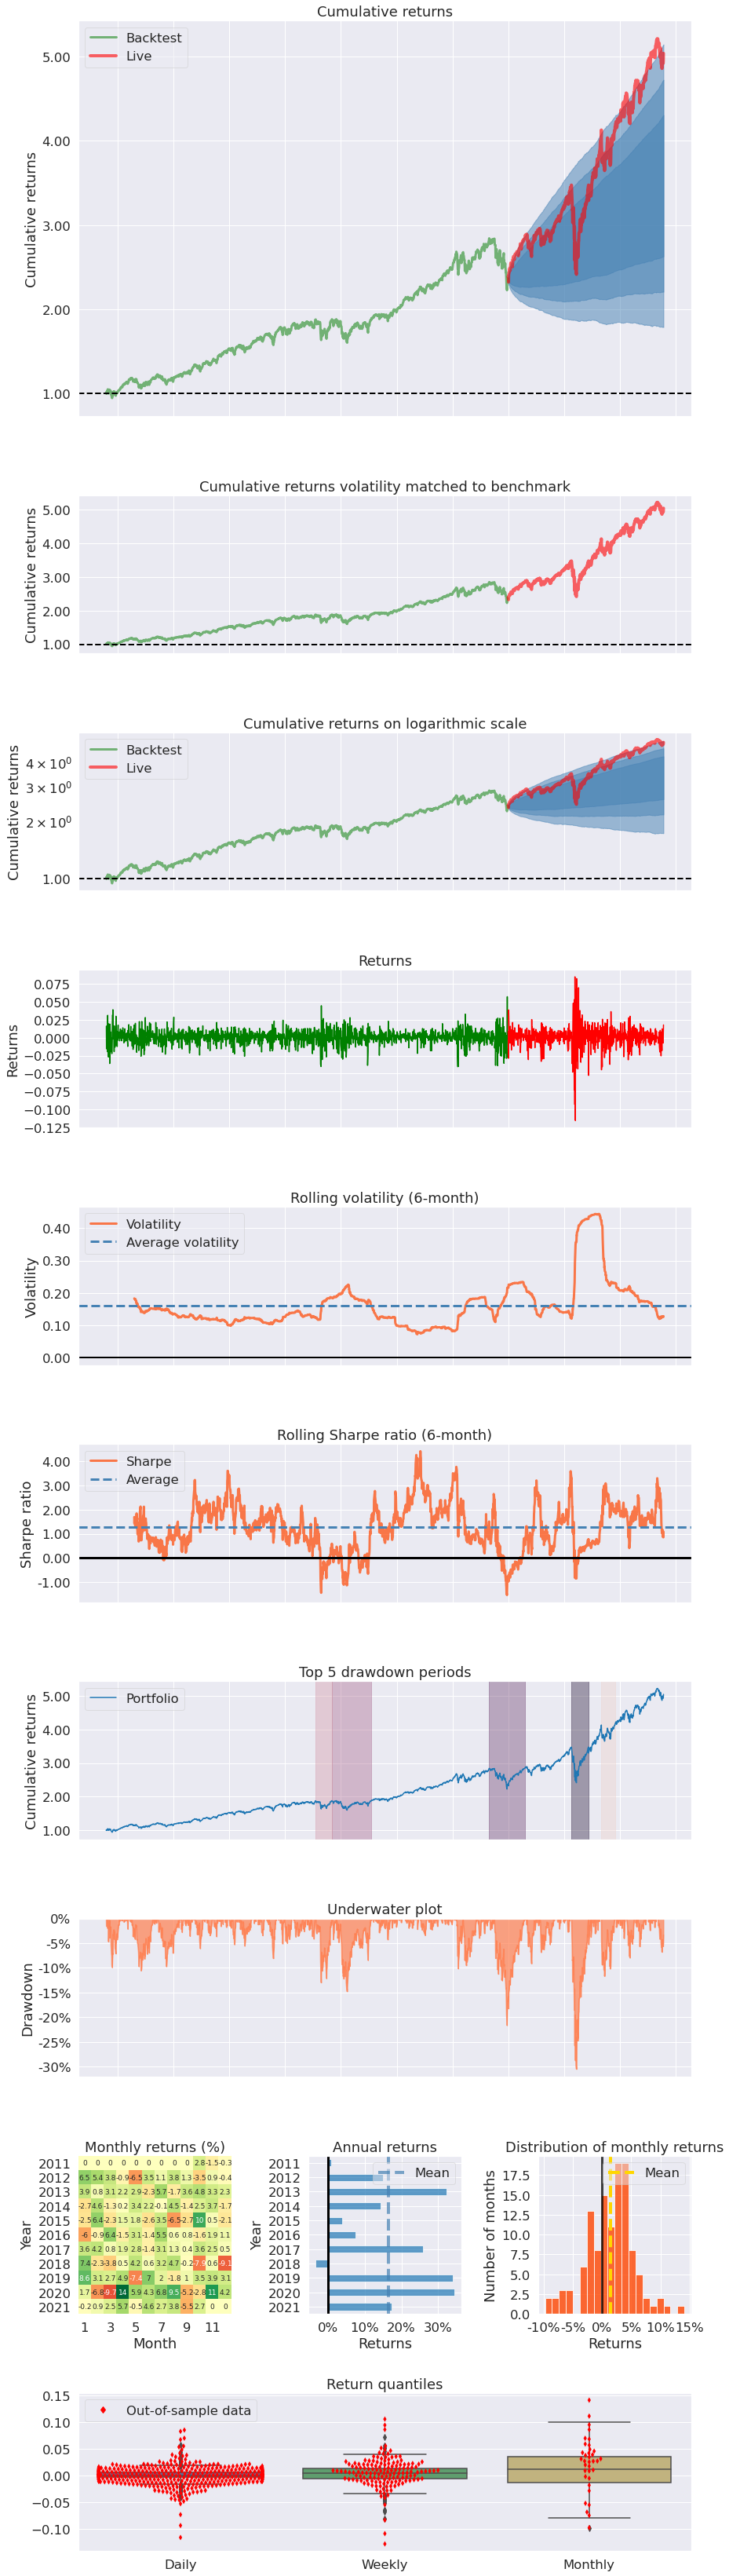

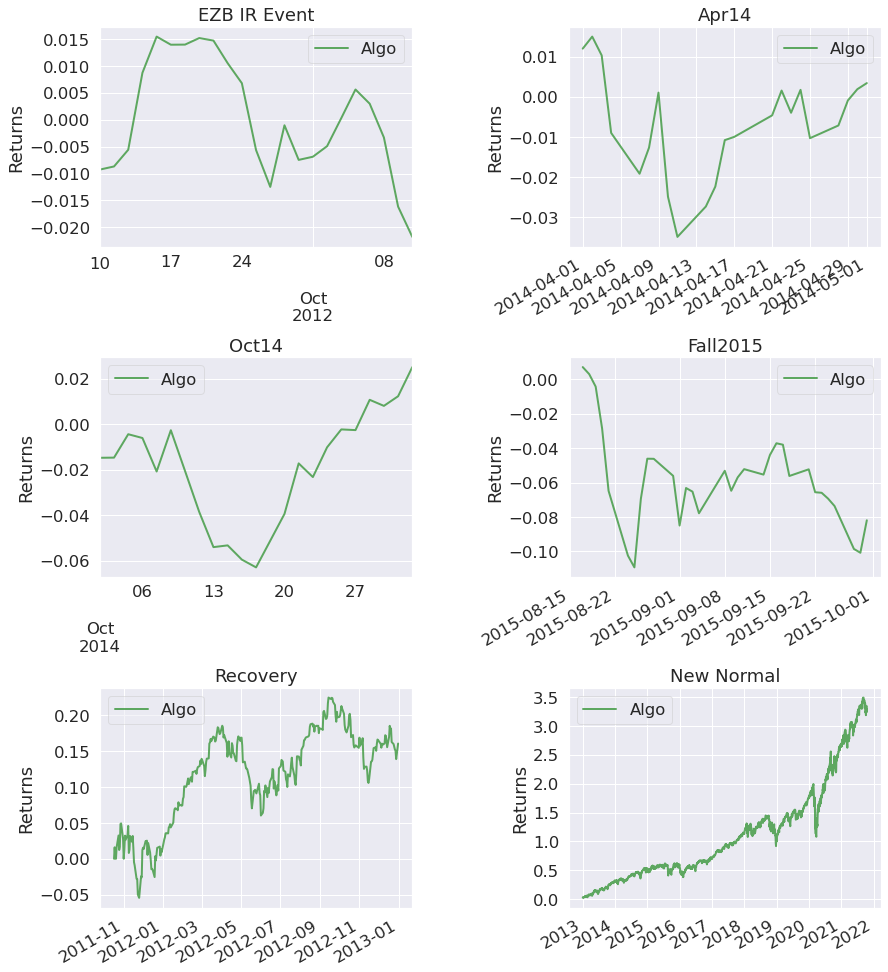

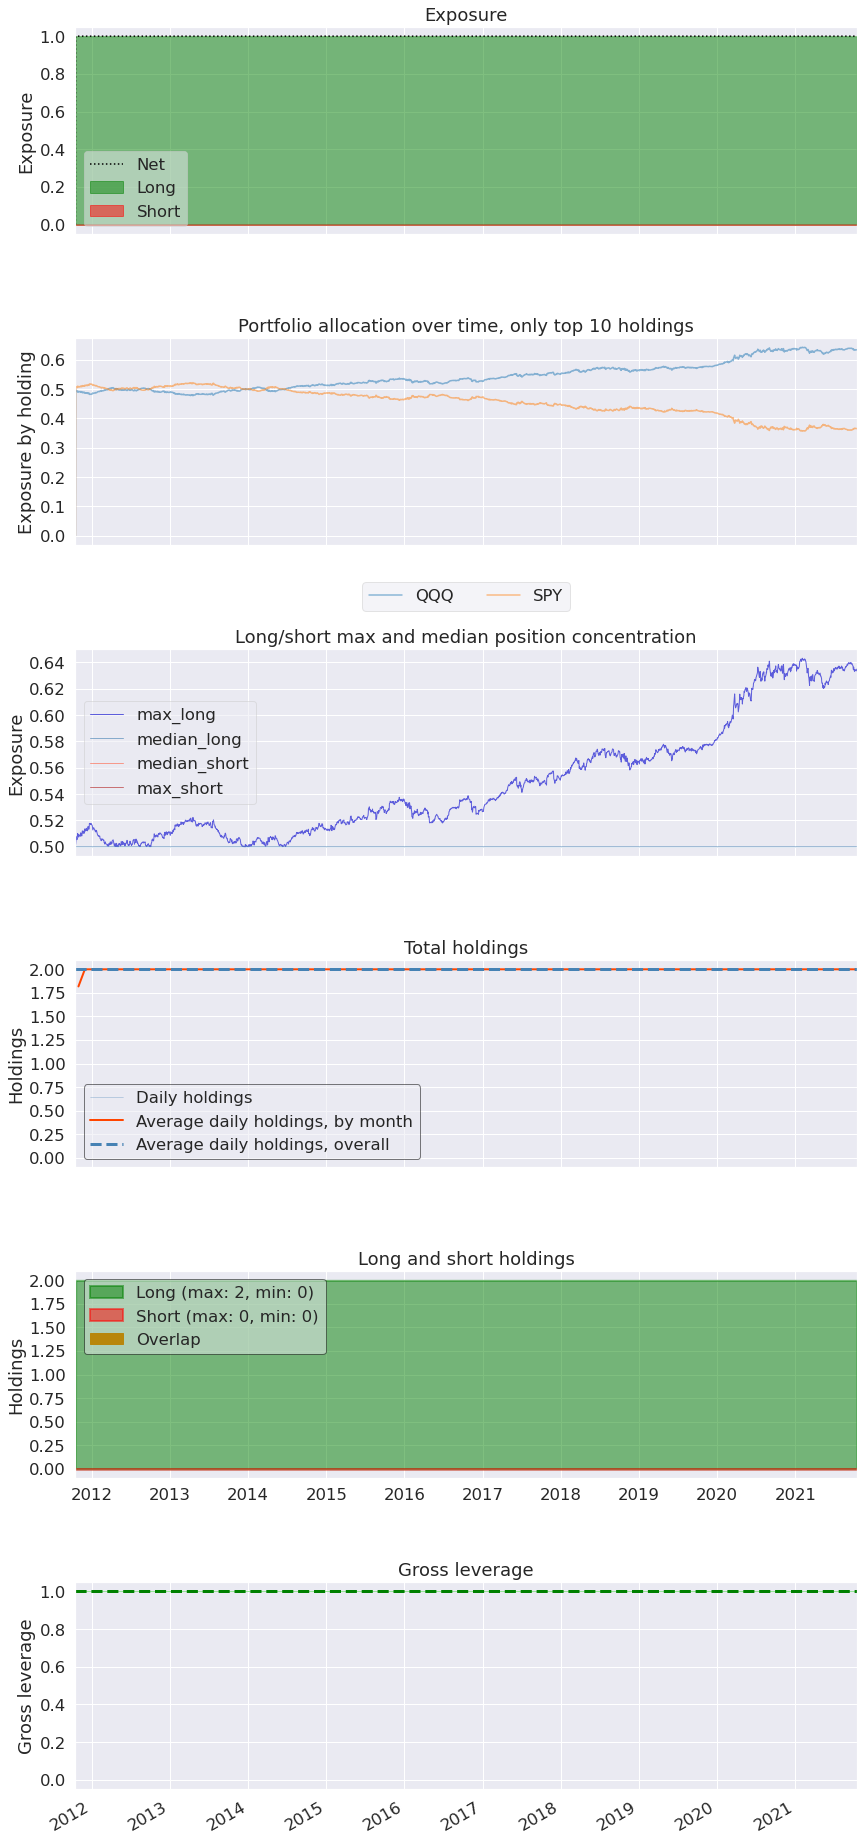

In [39]:
pf.create_full_tear_sheet(returns,
                          live_start_date='2018-12-31',
                          positions=positions
                         )

In [40]:
help(pf.plotting)

Help on module pyfolio.plotting in pyfolio:

NAME
    pyfolio.plotting

DESCRIPTION
    # Copyright 2018 Quantopian, Inc.
    #
    # Licensed under the Apache License, Version 2.0 (the "License");
    # you may not use this file except in compliance with the License.
    # You may obtain a copy of the License at
    #
    #     http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing, software
    # distributed under the License is distributed on an "AS IS" BASIS,
    # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    # See the License for the specific language governing permissions and
    # limitations under the License.

FUNCTIONS
    axes_style(style='darkgrid', rc=None)
        Create pyfolio default axes style context.
        
        Under the hood, calls and returns seaborn.axes_style() with
        some custom settings. Usually you would use in a with-context.
        
        Parameters
    

In [42]:
help(pf.timeseries)

Help on module pyfolio.timeseries in pyfolio:

NAME
    pyfolio.timeseries

DESCRIPTION
    # Copyright 2018 Quantopian, Inc.
    #
    # Licensed under the Apache License, Version 2.0 (the "License");
    # you may not use this file except in compliance with the License.
    # You may obtain a copy of the License at
    #
    #     http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing, software
    # distributed under the License is distributed on an "AS IS" BASIS,
    # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    # See the License for the specific language governing permissions and
    # limitations under the License.

FUNCTIONS
    aggregate_returns(returns, convert_to)
        Aggregates returns by week, month, or year.
        
        Parameters
        ----------
        returns : pd.Series
           Daily returns of the strategy, noncumulative.
            - See full explanation in :fun

<AxesSubplot:xlabel='Date'>

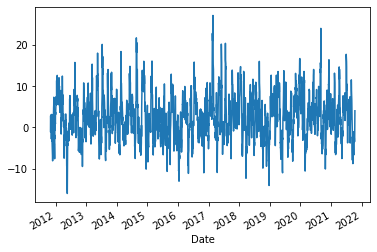

In [43]:
pf.timeseries.rolling_sharpe(returns, 10).plot()

In [44]:
# show overview of pyfolio.plotting submodule
[f for f in dir(pf.plotting) if 'plot_' in f]

['plot_annual_returns',
 'plot_capacity_sweep',
 'plot_cones',
 'plot_daily_turnover_hist',
 'plot_daily_volume',
 'plot_drawdown_periods',
 'plot_drawdown_underwater',
 'plot_exposures',
 'plot_gross_leverage',
 'plot_holdings',
 'plot_long_short_holdings',
 'plot_max_median_position_concentration',
 'plot_monthly_returns_dist',
 'plot_monthly_returns_heatmap',
 'plot_monthly_returns_timeseries',
 'plot_perf_stats',
 'plot_prob_profit_trade',
 'plot_return_quantiles',
 'plot_returns',
 'plot_rolling_beta',
 'plot_rolling_returns',
 'plot_rolling_sharpe',
 'plot_rolling_volatility',
 'plot_round_trip_lifetimes',
 'plot_sector_allocations',
 'plot_slippage_sensitivity',
 'plot_slippage_sweep',
 'plot_turnover',
 'plot_txn_time_hist',
 'show_and_plot_top_positions']

<AxesSubplot:title={'center':'Top 10 drawdown periods'}, ylabel='Cumulative returns'>

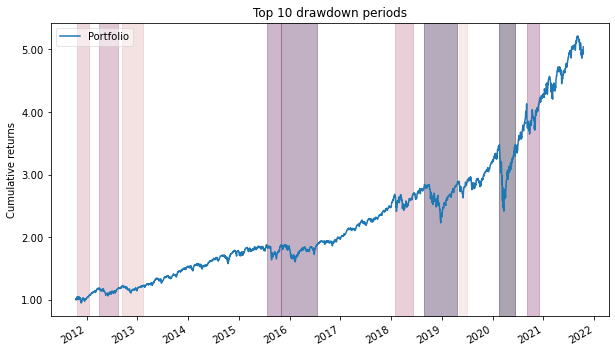

In [46]:
pf.plot_drawdown_periods(returns, figsize=(10, 6))

<AxesSubplot:title={'center':'Monthly returns (%)'}, xlabel='Month', ylabel='Year'>

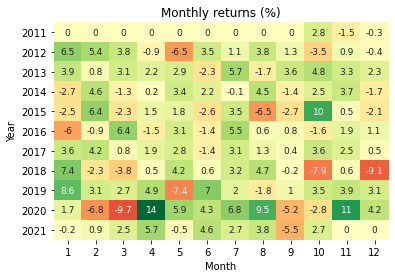

In [47]:
pf.plot_monthly_returns_heatmap(returns)